In [8]:
# ATTENTION: Please do not alter any of the provided code in the exercise. Only add your own code where indicated
# ATTENTION: Please do not add or remove any cells in the exercise. The grader will check specific cells based on the cell position.
# ATTENTION: Please use the provided epoch values when training.

# In this exercise you will train a CNN on the FULL Cats-v-dogs dataset
# This will require you doing a lot of data preprocessing because
# the dataset isn't split into training and validation for you
# This code block has all the required inputs
import os
import zipfile
import random
import tensorflow as tf
import shutil
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from os import getcwd

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(3,activation='softmax')
])

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [11]:
from keras.preprocessing.image import ImageDataGenerator

In [12]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   fill_mode='nearest',
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = train_datagen.flow_from_directory(
        'rps',
        target_size=(150, 150),
        batch_size=10,
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        'rps-test-set',
        target_size=(150, 150),
        batch_size=10,
        class_mode='categorical')
history=model.fit(
        train_generator,
        epochs=10,
        validation_data=validation_generator)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 252 steps, validate for 38 steps
Epoch 1/10
252/252 [==============================] - 16s 64ms/step - loss: 1.1209 - acc: 0.5536 - val_loss: 0.6369 - val_acc: 0.7392
Epoch 2/10
252/252 [==============================] - 15s 59ms/step - loss: 0.5664 - acc: 0.7635 - val_loss: 0.3038 - val_acc: 0.9140
Epoch 3/10
252/252 [==============================] - 15s 59ms/step - loss: 0.4124 - acc: 0.8496 - val_loss: 0.2696 - val_acc: 0.9113
Epoch 4/10
252/252 [==============================] - 15s 59ms/step - loss: 0.2866 - acc: 0.9000 - val_loss: 0.2725 - val_acc: 0.8710
Epoch 5/10
252/252 [==============================] - 15s 61ms/step - loss: 0.2005 - acc: 0.9345 - val_loss: 0.1260 - val_acc: 0.9543
Epoch 6/10
252/252 [==============================] - 15s 61ms/step - loss: 0.1620 - acc: 0.9520 - val_loss: 0.1152 - val_acc: 0.9731
Epoch 7/10
252/252 [

Text(0.5, 1.0, 'Training and validation loss')

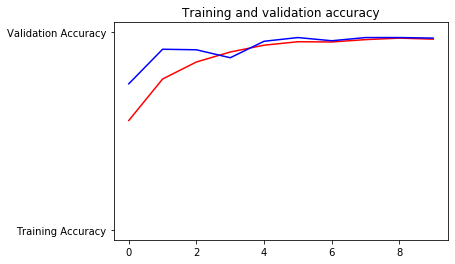

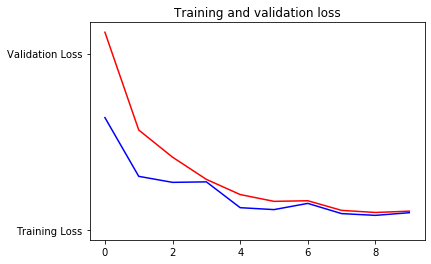

In [13]:
# PLOT LOSS AND ACCURACY
%matplotlib inline
model.save('rockpapersci.h5')
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

# Desired output. Charts with training and validation metrics. No crash :)

In [15]:
train_generator.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}

In [46]:
import numpy as np
from keras.preprocessing import image
test_image= image.load_img('scissors8.png',target_size=(150,150))
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
model.predict_classes(test_image)


array([2], dtype=int64)

In [48]:
model.save('rock_paper_scissor_97_Acc.h5')